In [1]:
import os
import numpy as np 
import matplotlib.pyplot as p1
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Conv2D, MaxPooling2D, Flatten, Dense,Dropout,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


In [6]:
dataset_dir = "D:\\DeepLearning\\Soybean--main\\Soybean Leaf Dataset for Disease Classification"

In [7]:
class_folders = sorted(os.listdir(dataset_dir))
print(class_folders)

['Bacterial Pustule', 'Frogeye Leaf Spot', 'Healthy', 'Rust', 'Sudden Death Syndrome', 'Target Leaf Spot', 'Yellow Mosaic']


In [8]:
image_height = 224  
image_width = 224

num_classes = len(class_folders)


Image Path: D:\DeepLearning\Soybean--main\Soybean Leaf Dataset for Disease Classification\Bacterial Pustule\BP (1).jpg
Original Image Shape  (3456, 4608, 3)


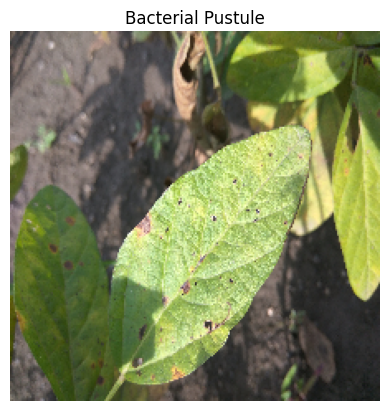

Image Path: D:\DeepLearning\Soybean--main\Soybean Leaf Dataset for Disease Classification\Frogeye Leaf Spot\Frogeye LS (1).jpg
Original Image Shape  (4608, 3456, 3)


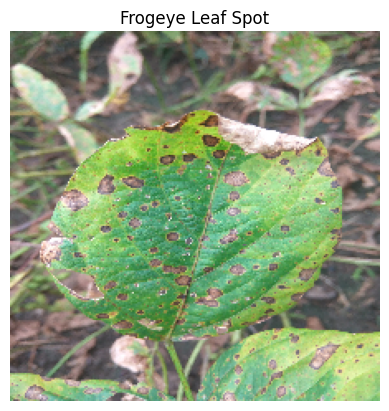

Image Path: D:\DeepLearning\Soybean--main\Soybean Leaf Dataset for Disease Classification\Healthy\Healthy (1).jpg
Original Image Shape  (4160, 3120, 3)


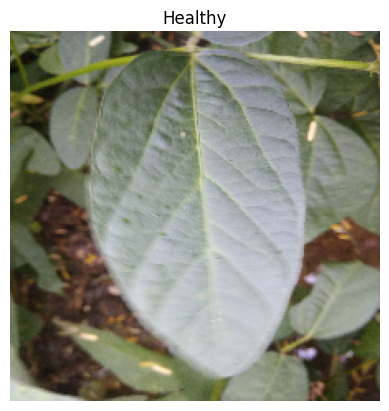

Image Path: D:\DeepLearning\Soybean--main\Soybean Leaf Dataset for Disease Classification\Rust\Rust (1).jpg
Original Image Shape  (3000, 4000, 3)


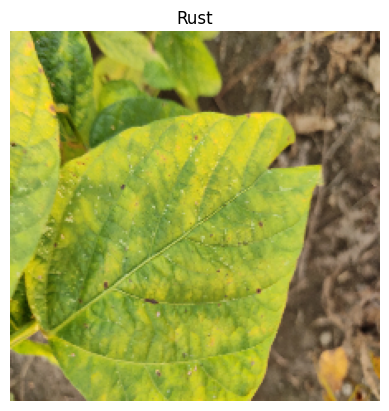

Image Path: D:\DeepLearning\Soybean--main\Soybean Leaf Dataset for Disease Classification\Sudden Death Syndrome\Sudden DS (1).jpg
Original Image Shape  (3456, 4608, 3)


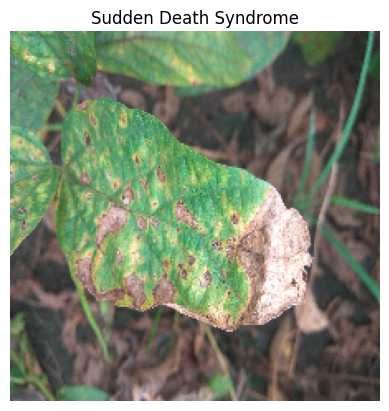

Image Path: D:\DeepLearning\Soybean--main\Soybean Leaf Dataset for Disease Classification\Target Leaf Spot\Target LS (1).jpg
Original Image Shape  (8000, 6000, 3)


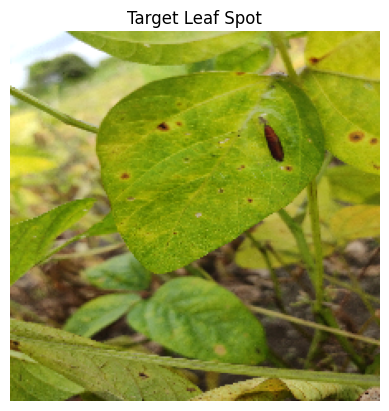

Image Path: D:\DeepLearning\Soybean--main\Soybean Leaf Dataset for Disease Classification\Yellow Mosaic\YM (1).jpg
Original Image Shape  (8000, 6000, 3)


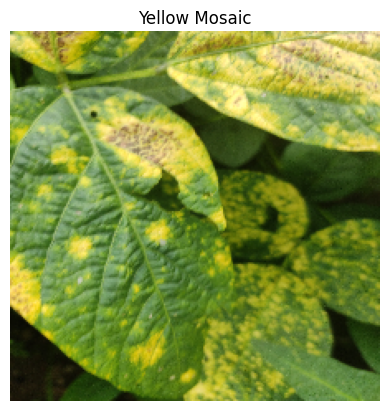

In [9]:
target_size = (224 , 224)

# Iterate over each class folder
for class_folder in class_folders:
    class_path = os.path.join(dataset_dir, class_folder)
    
    # Get a list of image files in the current class folder
    image_files = sorted(os.listdir(class_path))
    
    # Load and display the first image from the current class folder
    if image_files:
        image_path = os.path.join(class_path, image_files[0])
        print("Image Path:", image_path)  # Debug print
        if os.path.exists(image_path):  # Check if the image file exists
            image = cv2.imread(image_path)
            if image is not None:
                print("Original Image Shape ",image.shape)

                #Resize the image to target size
                image = cv2.resize(image , target_size)
                #Convert BGR to RGB
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                # Normalize pixel values
                image = image/255.0

                #Display the image
                p1.imshow(image)
                p1.title(class_folder)
                p1.axis('off')
                p1.show()
            else:
                print("Error: Unable to load image")
        else:
            print("Error: Image file does not exist")
    else:
        print("Error: No image files found in", class_folder)

In [10]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20 ,
    width_shift_range = 0.2 ,
    height_shift_range = 0.2 ,
    shear_range = 0.2,
    zoom_range = 0.2,
    vertical_flip = True,
    horizontal_flip = True,
    # brightness_range = [0.5 , 1.5],
    # fill_mode = 'nearest',
    validation_split = 0.2 # splitting data into training and validation datasets
)

# Load and preprocess images 
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size,
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size,
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 276 images belonging to 7 classes.
Found 69 images belonging to 7 classes.


In [11]:
model = Sequential([
    Conv2D(32 ,(3,3),activation = 'relu' , input_shape =(image_height , image_width , 3)),
    MaxPooling2D((2,2)),
    Conv2D(64 , (3,3),activation = 'relu' , input_shape =(image_height , image_width , 3)),
    MaxPooling2D((2,2)),
    Conv2D(128 , (3,3),activation = 'relu' , input_shape =(image_height , image_width , 3)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128 , activation = 'relu'),
    Dropout(0.5),
    Dense(num_classes , activation = 'softmax')
])

model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])


C:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
# Define callback functions
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)

# Train the model with callbacks
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=40,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

Epoch 1/40


C:\Users\himan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


## Using the Inception Model

In [49]:
# Load the InceptionV3 model pre-trained on ImageNet without including the top layer
base_model = InceptionV3(weights='imagenet', include_top=False)

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(1024, activation='relu')(x)

# Add an output layer with softmax activation for classification
predictions = Dense(num_classes, activation='softmax')(x)

# Combine the base model with the top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [52]:
# Define callback functions
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)

# Train the model with callbacks
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=40,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

Epoch 1/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 932ms/step - accuracy: 0.7262 - loss: 0.6479
Epoch 1: val_accuracy improved from -inf to 0.62500, saving model to best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.7302 - loss: 0.6426 - val_accuracy: 0.6250 - val_loss: 0.8547 - learning_rate: 1.6000e-06
Epoch 2/40
1/8 ━━━━━━━━━━━━━━━━━━━━ 3s 533ms/step - accuracy: 0.8750 - loss: 0.4837
Epoch 2: val_accuracy did not improve from 0.62500
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8750 - loss: 0.2721 - val_accuracy: 0.4000 - val_loss: 0.5584 - learning_rate: 1.6000e-06
Epoch 3/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 911ms/step - accuracy: 0.7602 - loss: 0.6670
Epoch 3: val_accuracy improved from 0.62500 to 0.64062, saving model to best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.7591 - loss: 0.6669 - val_accuracy: 0.6406 - val_loss: 0.8638 - learning_rate: 1.6000e-06
Epoch 4/40
1/8 ━━━━━━━━━━━━━━━━━━━━ 3s 520ms/step - accuracy: 0.7500 - loss: 0.8872
Epoch 4: val_a